# Customizing figures

Sometimes, even though relatively customizeable, the `plot` method of `scipp` is not flexible enough for one's needs. In this section, we explore how the figures produced by the `scipp.plot` module can be further modified.

## Modifying the returned SciPlot object

There are two ways of customizing `scipp` figures. The first one is to first create a default figure using the `plot` function, and then modifying its contents.

The `plot` commands actually returns a `SciPlot` object which is basically a Python `dict` that contains all the different plot elements, (including the control widgets) grouped into a convenient fashion, and whose notebook representation (`__repr__`) has been muted to limit noise in notebooks.

In [1]:
import numpy as np
import scipp as sc
from scipp.plot import plot

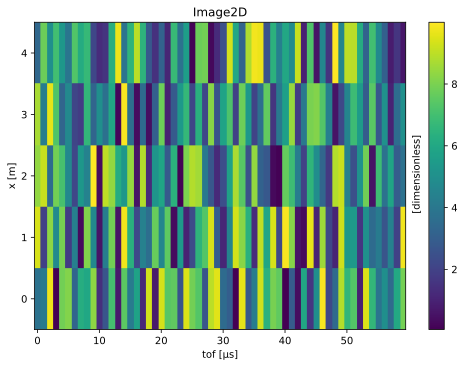

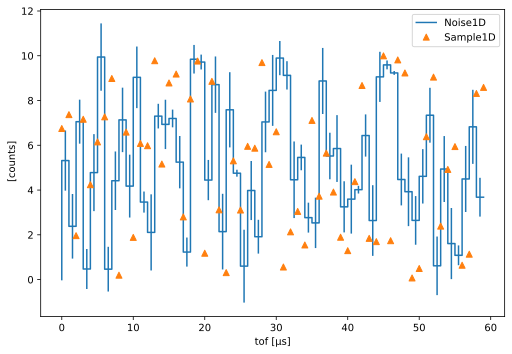

In [2]:
N = 60
M = 5
d = sc.Dataset()
d.coords['tof'] = sc.Variable(['tof'],
                              values=np.arange(N).astype(np.float64),
                              unit=sc.units.us)
d['Sample1D'] = sc.Variable(['tof'], values=10.0*np.random.rand(N),
                            unit=sc.units.counts)
d['Noise1D'] = sc.Variable(['tof'], values=10.0*np.random.rand(N-1),
                           variances=3.0*np.random.rand(N-1),
                           unit=sc.units.counts)
d.coords['x'] = sc.Variable(['x'], values=np.arange(M).astype(np.float64),
                            unit=sc.units.m)
d['Image2D'] = sc.Variable(['x', 'tof'], values=10.0*np.random.rand(M, N),
                           variances=np.random.rand(M, N))
out = plot(d)

The `out` object contains one key per figure, which is either a combination of `Dimension` and unit for 1d plots, or the name of the variable (`Image2D`) in out case:

In [3]:
print(out.keys())
print(out['tof.counts'])

dict_keys(['Image2D', 'tof.counts'])
{'widgets': {'sliders': {'tof': IntSlider(value=0, description='tof', disabled=True, layout=Layout(display='none'), max=59, readout=False)}, 'togglebuttons': {'tof': ToggleButtons(disabled=True, layout=Layout(display='none'), options=('X',), style=ToggleButtonsStyle(button_width='70px'), value='X')}, 'togglebutton': {}, 'buttons': {}, 'labels': {'tof': Label(value='tof', layout=Layout(display='none'))}}, 'lines': {'Noise1D': <matplotlib.lines.Line2D object at 0x7f9a89298d10>, 'Sample1D': <matplotlib.lines.Line2D object at 0x7f9a89232450>}, 'error_x': {}, 'error_y': {'Noise1D': <ErrorbarContainer object of 3 artists>}, 'error_xy': {}, 'masks': {}, 'fig': <Figure size 800x533 with 1 Axes>, 'ax': <matplotlib.axes._subplots.AxesSubplot object at 0x7f9a892666d0>}


It is then possible to customize figures such as changing a line color or an axis label (note that in case of the 2D images, the `'ax'` object is a `dict` as it can contain axes for both `'values'` and `'variances'`):

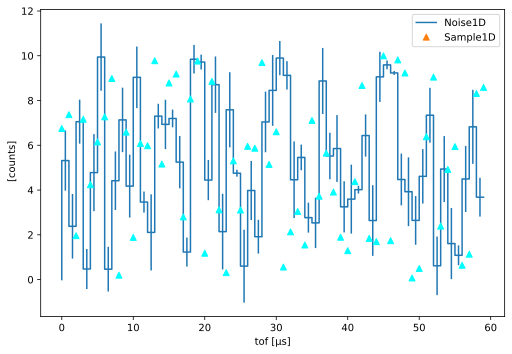

In [4]:
out['tof.counts']['lines']['Sample1D'].set_color('cyan')
out['Image2D']['ax']['values'].set_xlabel('A shiny new axis label!')
out['tof.counts']['fig']

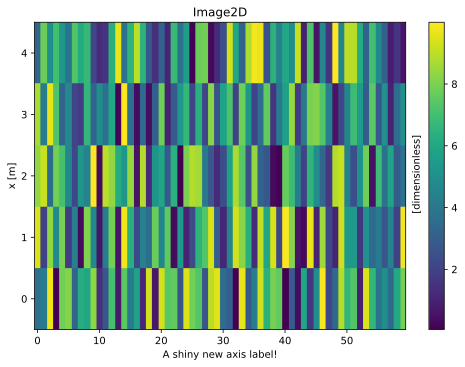

In [5]:
out['Image2D']['fig']

## Placing figures inside existing Matplotlib axes

Sometimes, the `scipp` default graphs are not flexible enough for advanced figures. One common case is placing figures in subplots, for example. To this end, it is also possible to attach `scipp` plots to existing `matplotlib` axes.

This is achieved via the `mpl_axes` keyword argument, and is best illustrated via a short demo.

In [6]:
import matplotlib.pyplot as plt

We first create 3 subplots:

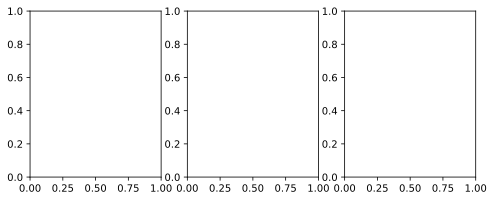

In [7]:
figs, axs = plt.subplots(1, 3, figsize=(8, 3))

Then a `Dataset` with some 2D data:

In [8]:
N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx[:-1], yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + ((y-c)/b)**2)
a = 10.0 * np.sin(r)
d1 = sc.Dataset()
d1.coords['x'] = sc.Variable(['x'], values=xx, unit=sc.units.m)
d1.coords['y'] = sc.Variable(['y'], values=yy, unit=sc.units.m)
d1['Signal'] = sc.Variable(['y', 'x'], values=a, unit=sc.units.counts)

Next, we attach the 2D image plot to the first subplot, and display the colorbar in the third subplot:

dict_keys(['Signal'])

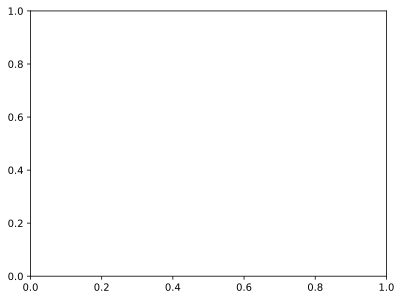

In [9]:
out = plot(d1, mpl_axes={'ax': axs[0], 'cax': axs[2]})
out.keys()

This has just returned a `dict` of `matplotlib` objects, but then we can check that our original figure has been updated:

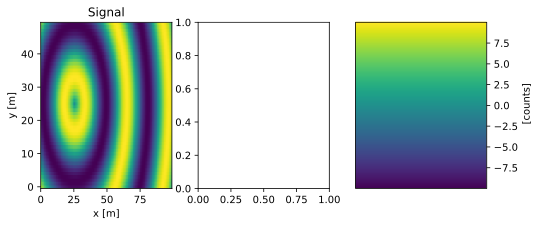

In [10]:
figs

We can add a 1D plot of a slice through the 2D data in the middle panel, and check once again the original figure:

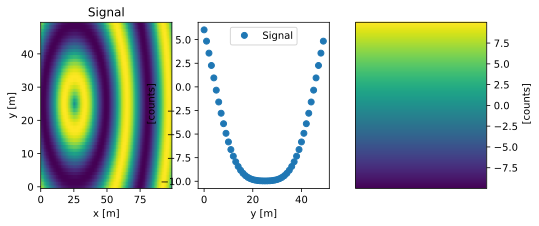

In [11]:
out1 = plot(d1['Signal']['x', 1], mpl_axes=axs[1])
figs

Next we create a second dataset with some more 1D data and add it to the middle panel:

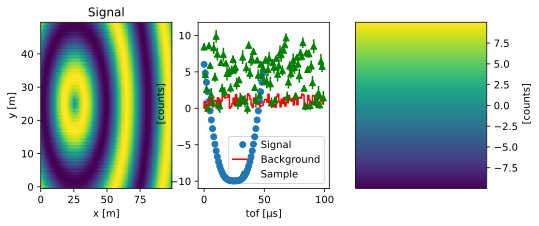

In [12]:
d2 = sc.Dataset()
N = 100
d2.coords['tof'] = sc.Variable(['tof'],
                               values=np.arange(N).astype(np.float64),
                               unit=sc.units.us)
d2["Sample"] = sc.Variable(['tof'],
                           values=10.0 * np.random.rand(N),
                           variances=np.random.rand(N),
                           unit=sc.units.counts)
d2["Background"] = sc.Variable(['tof'],
                               values=2.0 * np.random.rand(N-1),
                               unit=sc.units.counts)
out2 = plot(d2, mpl_axes=axs[1], color=['r', 'g'])
figs

We can now for example modify the axes labels:

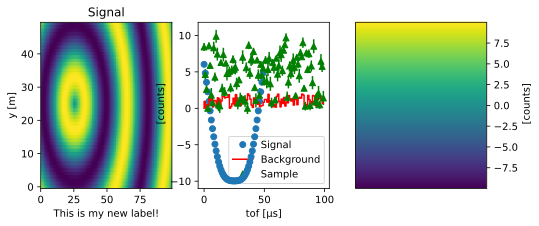

In [13]:
axs[0].set_xlabel('This is my new label!')
figs

You can then also access the individual plot objects and change their properties. For example, if we wish to show a line connecting the green `'Sample'` markers, we can do:

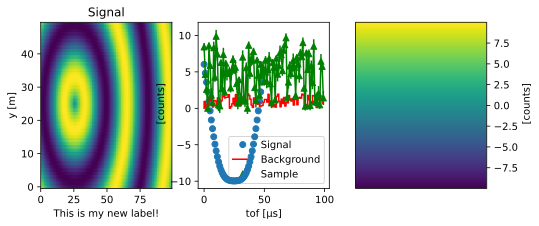

In [14]:
out2['tof.counts']['lines']['Sample'].set_linestyle('solid')
figs